## Polynomial Linear Regression 


### Polynomial Regression
#### Polynomial Regression is a form of linear regression in which the relationship between the independent variable x and dependent variable y is modeled as an nth degree polynomial. Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y, denoted E(y |x).

#### Pros 
 - very simple to work with 
 - easy to interpret results

#### Cons
 - numerical values only, categorical will not work 
 - assumes a non-linear relationship between dependent and independent variables

### Model Set Up

#### Steps
 - load the data
 - inspect, clean, organize data
 - check for, handle outliers 
 - encode data if necessary 
 - set features and target 
 - train, test split the data 
 - scale the data if necessary 
 - build the model, fit on the data, run the model
 - run metrics, analyze, view results, adjust parameters, repeat until satisfied... 


### Regression Models

#### Polynomial-Linear Regression
 - a curved-line fit to data
 - a generalized case of linear regression 
 - assume the polynomial dependence between the output and inputs and, consequently, the polynomial estimated regression function


#### Models

##### Import + Inspect

In [ ]:
### imports ###
import pandas as pd
import numpy as np
import sklearn
df = pd.read_csv('https://raw.githubusercontent.com/CVanchieri/CS_Notes/main/Regression_Notes/winequality-red.csv') # read in the file 
print('data frame shape:', df.shape)
df.head()

data frame shape: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
### inspecting the data ###
print('--- INSPECTING THE DATA --- ')
print('--- columns --- ')
print(df.columns)
print('--- types --- ')
print(df.dtypes)
print('--- NA counts --- ')
print(df.isna().sum())
print('--- numericals descriptions --- ')
df.describe()

--- INSPECTING THE DATA --- 
--- columns --- 
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
--- types --- 
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object
--- NA counts --- 
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality   

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
### view basic feature correlations ###
print('--- feature correlations ---')
df.corr()

--- feature correlations ---


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


--- feature correlations heatmap ---


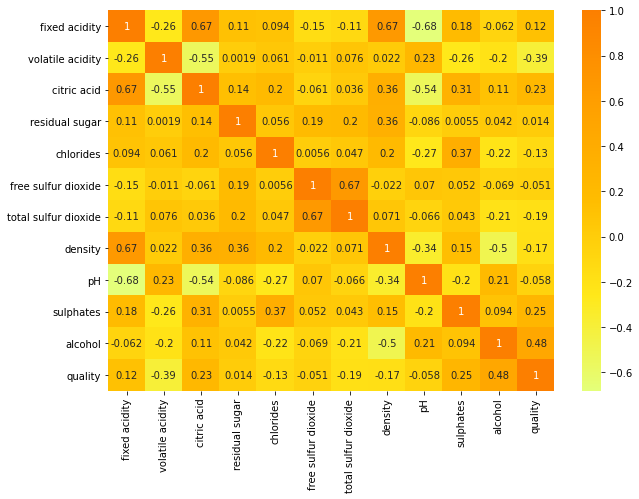

In [ ]:
### view basic feature correlations in a heatmap ###
import seaborn as sns
import matplotlib.pyplot as plt 
f, ax = plt.subplots(1, 1, figsize = (10, 7))
print('--- feature correlations heatmap ---')
sns.heatmap(df.corr() , cmap = 'Wistia' , annot = True)

--- bar plots ---


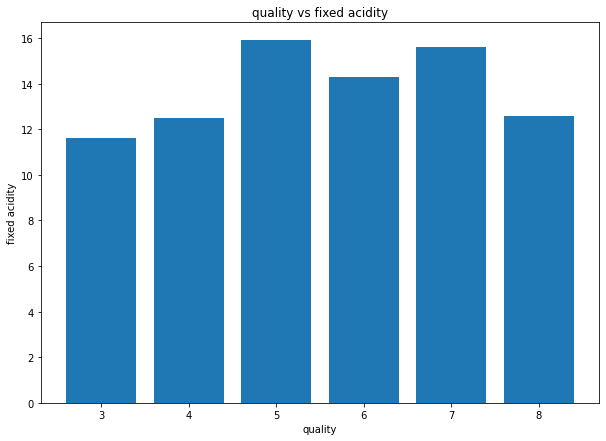

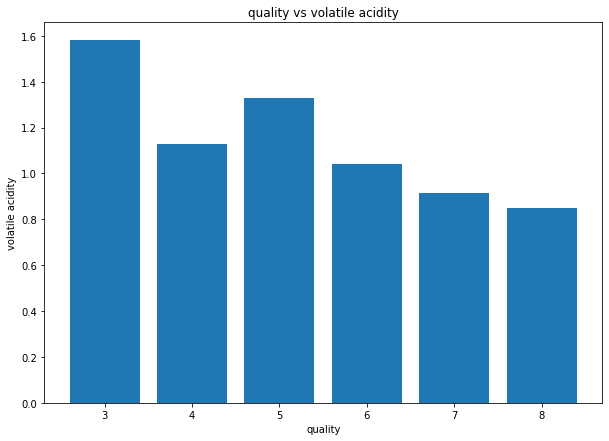

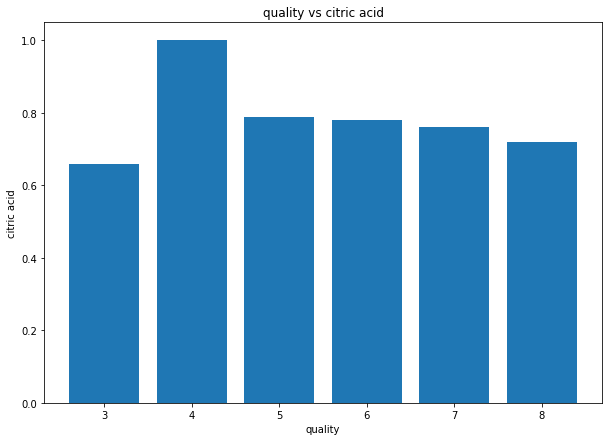

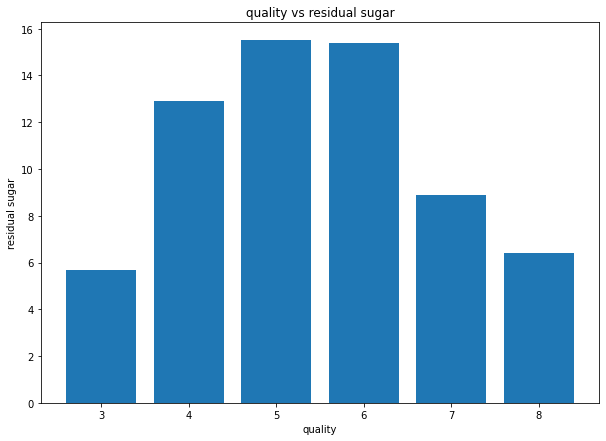

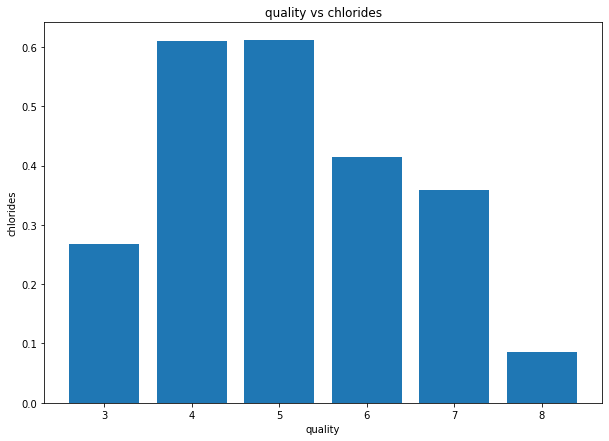

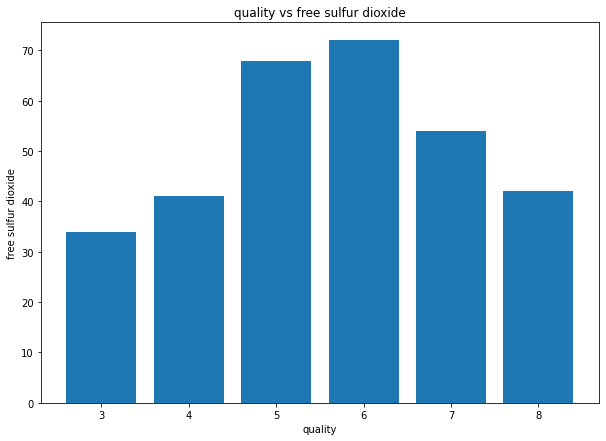

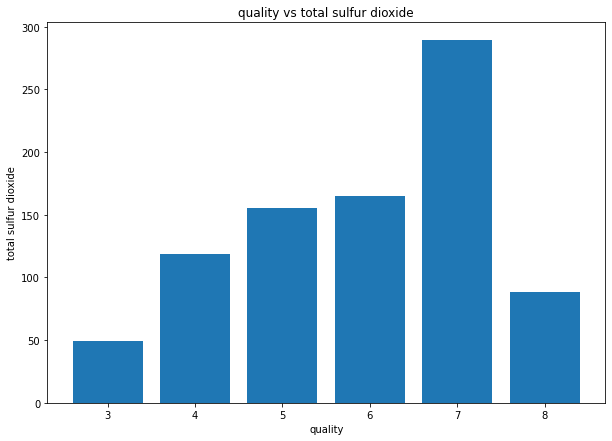

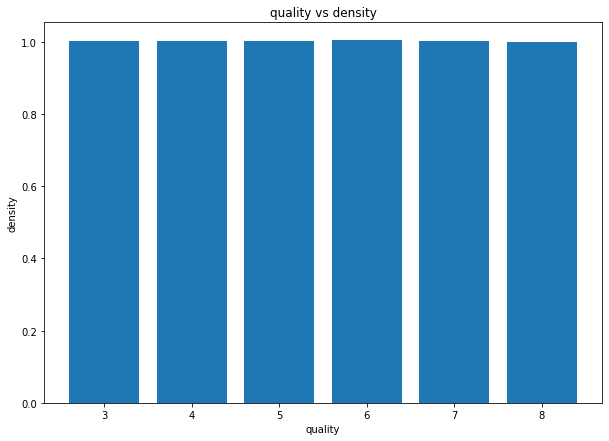

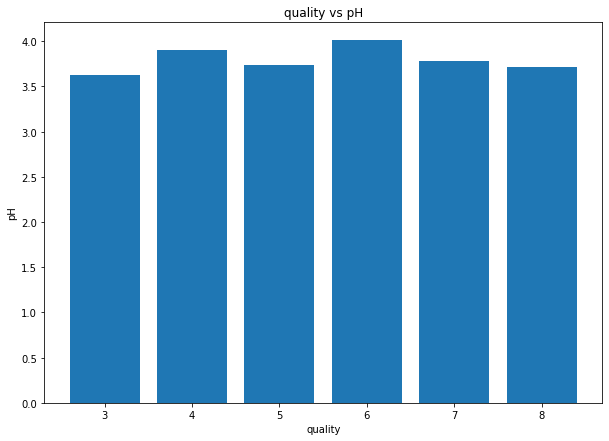

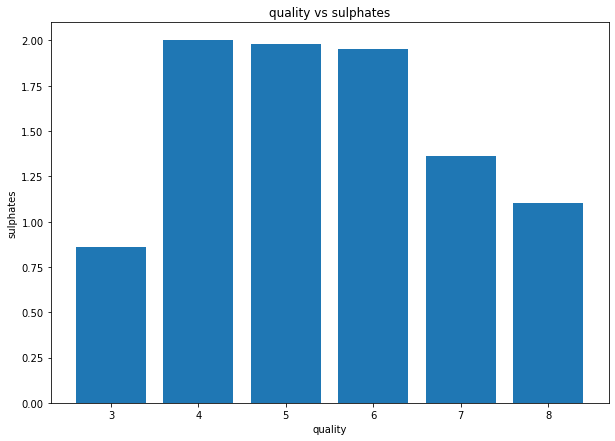

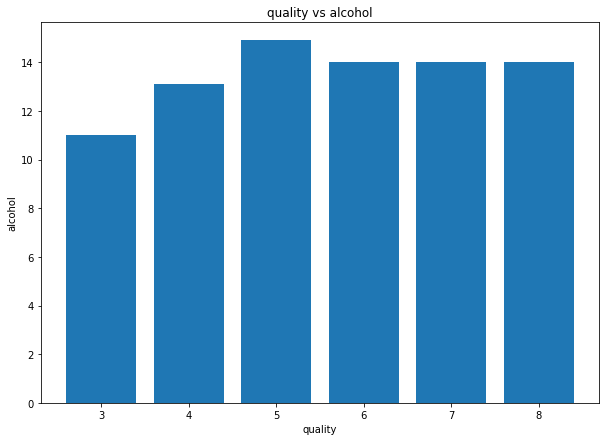

In [ ]:
### view scatter plots for each feature vs. target ###
import matplotlib.pyplot as plt 
target_ = 'quality' # set the target
features_ = df.iloc[:, 0:11] # set the features
print('--- bar plots ---')
for feature in features_:
    figure = plt.figure
    f, ax = plt.subplots(1, 1, figsize = (10, 7))
    ax = plt.gca()
    ax.bar(df[target_], df[feature])
    ax.set_xlabel(target_)
    ax.set_ylabel(feature)
    ax.set_title(f'''{target_} vs {feature}''')
    plt.show()

##### Encode + Clean + Organize

In [ ]:
### no encoding necessary all numericals ###

--- box plots --- 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_o

<Figure size 432x288 with 0 Axes>

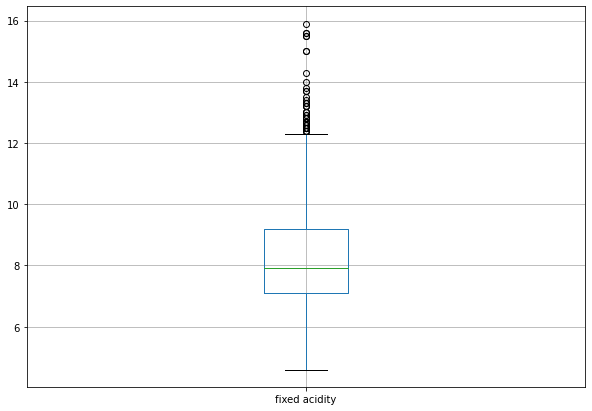

<Figure size 432x288 with 0 Axes>

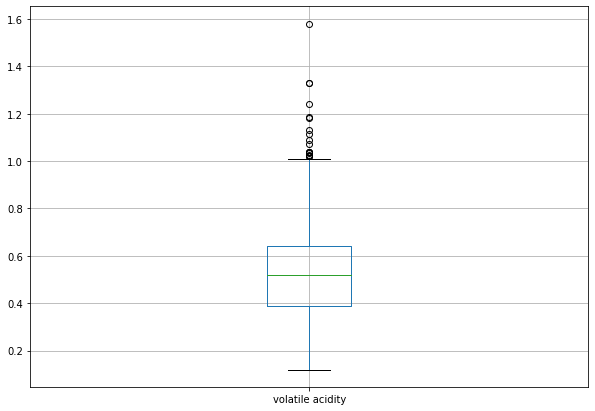

<Figure size 432x288 with 0 Axes>

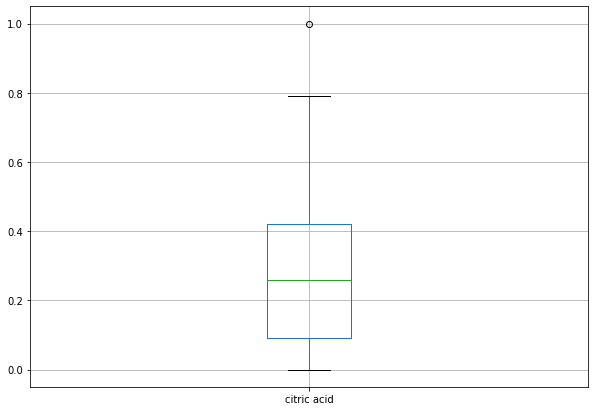

<Figure size 432x288 with 0 Axes>

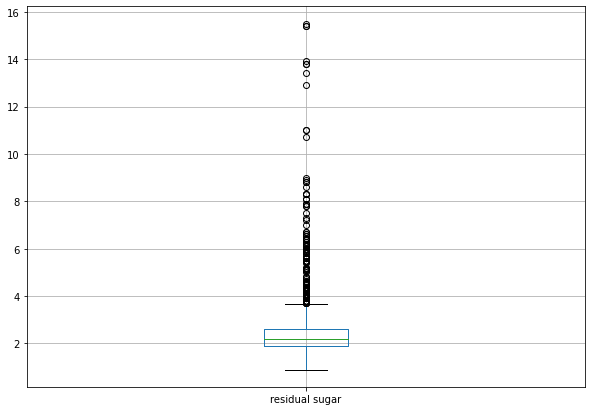

<Figure size 432x288 with 0 Axes>

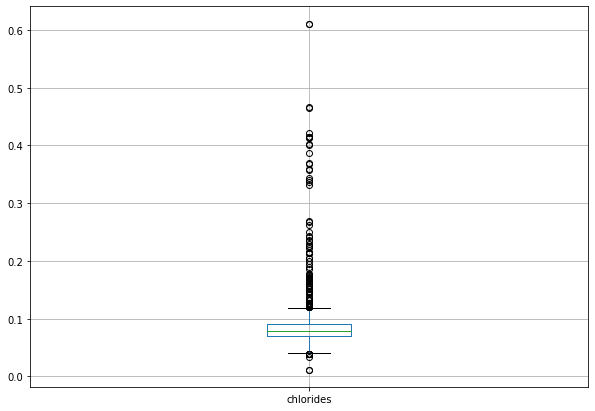

<Figure size 432x288 with 0 Axes>

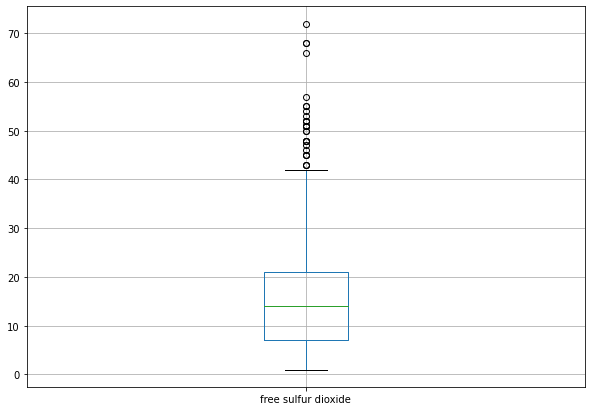

<Figure size 432x288 with 0 Axes>

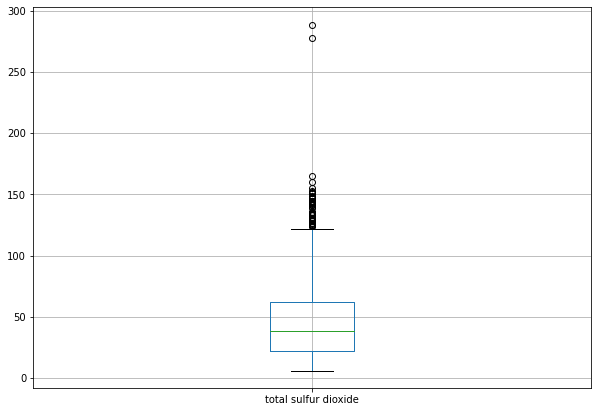

<Figure size 432x288 with 0 Axes>

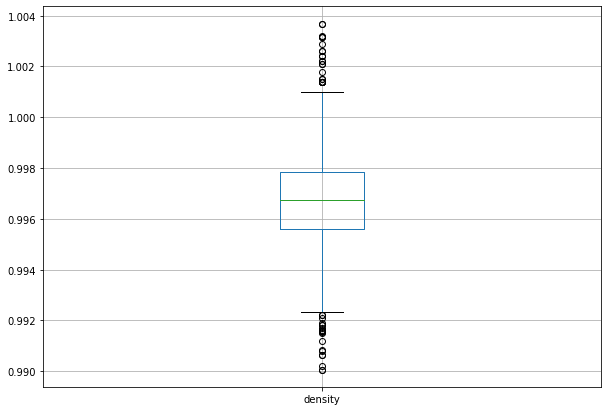

<Figure size 432x288 with 0 Axes>

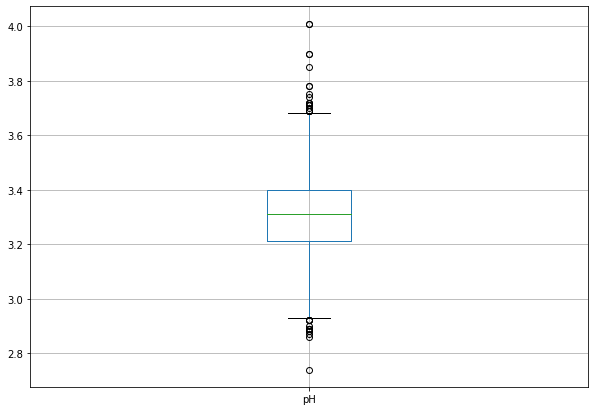

<Figure size 432x288 with 0 Axes>

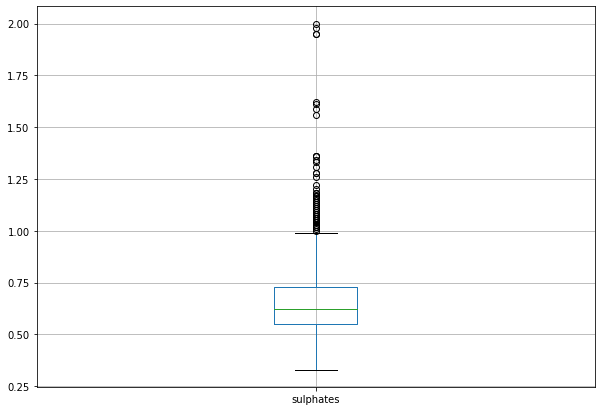

<Figure size 432x288 with 0 Axes>

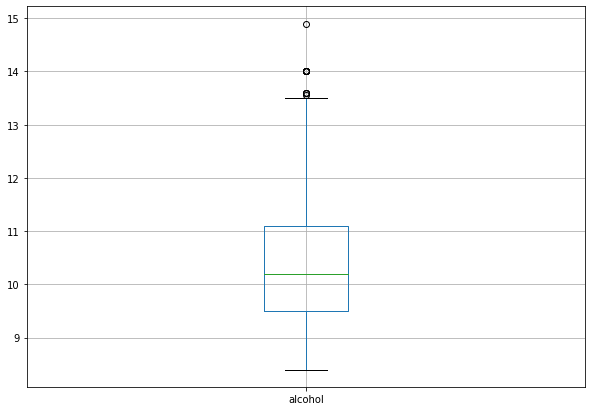

<Figure size 432x288 with 0 Axes>

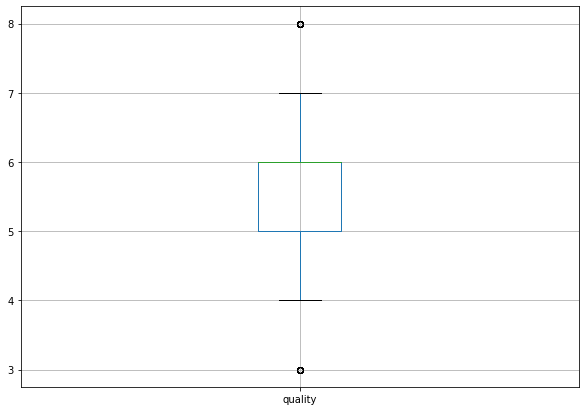

In [ ]:
### check for outliers in the data ### 
import matplotlib.pyplot as plt
# view each feature in a boxplot 
print('--- box plots --- ')
for column in df:
    plt.figure() # plot figure 
    f, ax = plt.subplots(1, 1, figsize = (10, 7))
    df.boxplot([column]) # set data

In [ ]:
### function to find outliers in the data ###
def outlier_zscore(data):
    global outliers,zscore
    outliers = [] 
    zscore = [] 
    threshold = 3.5 # set threshold 
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i - mean)/std # calculate the z_score
        zscore.append(z_score) # append the score to the zscore
        if np.abs(z_score) > threshold: 
            outliers.append(i) # append z_score the outliers
    print(outliers)
    return len(outliers), outliers

In [ ]:
### run each feature 'wanted' through the function ### 
print('--- possible outliers --- ')
total_sulfur_dioxide_number, total_sulfur_dioxide_outliers = outlier_zscore(df['total sulfur dioxide'])

--- possible outliers --- 
[165.0, 278.0, 289.0]


In [ ]:
### removal of outliers per feature ###
for num, i in enumerate(df['total sulfur dioxide']): 
    if i in total_sulfur_dioxide_outliers:
        df['total sulfur dioxide'][num] = 150 # choose replacement score

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


#### Polynomial Regression Model
 - GridSearch CV 
 - RandomizedSearch CV 

In [ ]:
### copy the data frame ###
df1 = df.copy()

In [ ]:
### split the data into features & target sets ###
X = df1.iloc[:, 0:11].values # features 
y = df1.iloc[:, 11].values # target 
print('--- data shapes --- ')
print('X shape:', X.shape)
print('y shape:', y.shape)

--- data shapes --- 
X shape: (1599, 11)
y shape: (1599,)


In [ ]:
### set the train test split parameters ###
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # split 80/20

In [ ]:
### feature scaling ### 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # initiate the scalar   
X_train = sc.fit_transform(X_train) # fit transform the train data 
X_test = sc.transform(X_test) # transform the test data 

In [ ]:
### polynomial regression model ###
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
poly = PolynomialFeatures(degree = 1) # degree = 1
X_poly = poly.fit_transform(X_train)
poly.fit(X_poly, y_train) 
X_test_poly = poly.fit_transform(X_test) 
### linear regression model ###
model = LinearRegression() 
print('--- model runtime --- ')
%time model.fit(X_poly, y_train)
y_pred = model.predict(X_test_poly) 
### create data frame of predictions and results ### 
y_pred_df = pd.DataFrame(y_pred, columns=["Predicted_Values" ])
y_test_df = pd.DataFrame(np.array(y_test), columns=["Real_Values"]) 
df_poly_final = pd.concat([y_test_df , y_pred_df] , axis=1)
print('--- real values vs predicted values ---')
print(df_poly_final.head())
### get the model metrics ###
print('--- model metrics ---') 
print('mean absolute error:', metrics.mean_absolute_error(y_test, y_pred)) # mae 
print('mean squared error:', metrics.mean_squared_error(y_test, y_pred)) # mse 
print('root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # rmse
print('intercept:', model.intercept_) # get the intercept
print('coefficients:', model.coef_) # get the coefficients
score = metrics.r2_score(y_test , y_pred) # get the r2 score 
print("r2 score : {}".format(score)) # show the r2 score
print('model score:', model.score(X_poly, y_train)) # show the model score 
print("model accuracy: {}%".format(score * 100)) # show the model accuracy

--- model runtime --- 
CPU times: user 509 µs, sys: 1.01 ms, total: 1.52 ms
Wall time: 1.18 ms
--- real values vs predicted values ---
   Real_Values  Predicted_Values
0            6          5.780812
1            5          5.044411
2            7          6.595246
3            6          5.348717
4            5          5.939156
--- model metrics ---
mean absolute error: 0.4683455520201097
mean squared error: 0.3829431762291927
root mean squared error: 0.6188240268680529
intercept: 5.646598905394846
coefficients: [ 0.          0.06407222 -0.2072839  -0.03226829  0.03693782 -0.09071668
  0.03777729 -0.10631762 -0.05242127 -0.04208797  0.16254793  0.28374258]
r2 score : 0.3310579794290458
model score: 0.3670422930835868
model accuracy: 33.10579794290458%


--- distplot accuracy --- 


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


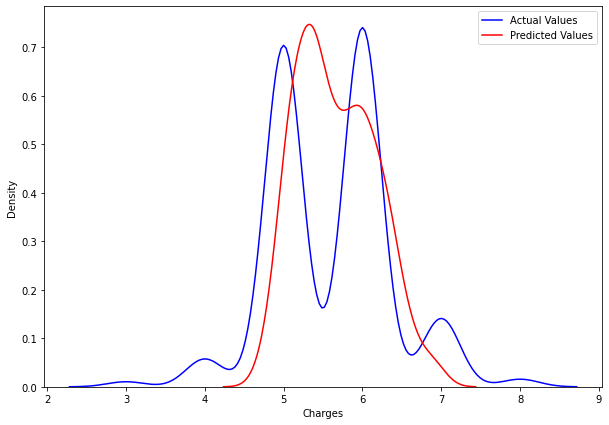

In [ ]:
### visualize the model prediction accuracy ###
import seaborn as sns
import matplotlib.pyplot as plt
### configure the plot ###
print('--- distplot accuracy --- ')
f, ax = plt.subplots(1, 1, figsize = (10, 7))
ax1 = sns.distplot(y_test, hist=False, color="b", label="Actual Values")
sns.distplot(y_pred, hist=False, color="r", label="Predicted Values" , axlabel='Charges', ax=ax1)
plt.legend()

##### GridSearch CV

In [ ]:
### copy the data frame ###
df2 = df.copy()

In [ ]:
### split the data into features & target sets ###
X = df2.iloc[:, 0:11].values # set the features 
y = df2.iloc[:, 11].values # set the target 
print('--- data shapes --- ')
print('X shape:', X.shape) 
print('y shape:', y.shape) 

--- data shapes --- 
X shape: (1599, 11)
y shape: (1599,)


In [ ]:
### set the train test split parameters ###
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # 80/20

In [ ]:
### feature scaling ### 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # initiate the scalar   
X_train = sc.fit_transform(X_train) # fit transform the data with scalar
X_test = sc.transform(X_test) # fit transform the data with scalar

In [ ]:
### polynomial regression + grid search CV model ###
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
model1 = LinearRegression()
param_grid = {  # create the param grid 
            'copy_X': [True, False],
            'fit_intercept': [True, False],
            'n_jobs' : [2, 6, 10, 15],
            'normalize' : [True, False],
              }
CV_rfc = GridSearchCV(estimator=model1, param_grid=param_grid, cv=3) 
print('--- model runtime --- ')
%time CV_rfc.fit(X_train, y_train)
print('--- best params --- ')
CV_rfc.best_params_

--- model runtime --- 
CPU times: user 264 ms, sys: 193 ms, total: 457 ms
Wall time: 252 ms
--- best params --- 


{'copy_X': True, 'fit_intercept': True, 'n_jobs': 2, 'normalize': True}

In [ ]:
### polynomial regression model + grid best params ###
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
poly = PolynomialFeatures(degree = 1) # degree = 4 
X_poly = poly.fit_transform(X_train)
poly.fit(X_poly, y_train)
X_test_poly = poly.fit_transform(X_test)
### linear regression model ###
model1 = LinearRegression(
                          copy_X= True,
                          fit_intercept= True,
                          n_jobs= 2,
                          normalize= True
                          ) 
print('--- model runtime --- ')
%time model1.fit(X_poly, y_train)
y_pred = model1.predict(X_test_poly)
### create data frame of predictions and results ### 
y_pred_df = pd.DataFrame(y_pred, columns=["Predicted_Values" ])
y_test_df = pd.DataFrame(np.array(y_test), columns=["Real_Values"])
df_poly_final = pd.concat([y_test_df , y_pred_df] , axis=1)
print('--- real values vs predicted values ---')
print(df_poly_final.head())
### get the model metrics ###
print('--- model metrics ---') 
print('mean absolute error:', metrics.mean_absolute_error(y_test, y_pred)) # mae 
print('mean squared error:', metrics.mean_squared_error(y_test, y_pred)) # mse 
print('root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # rmse
print('intercept:', model1.intercept_) # get the intercept
print('coefficients:', model1.coef_) # get the coefficients
score = metrics.r2_score(y_test , y_pred) # get the r2 score 
print("r2 score : {}".format(score)) # show the r2 score
print('model score:', model1.score(X_poly, y_train)) # show the model score 
print("model accuracy: {}%".format(score * 100)) # show the model accuracy

--- model runtime --- 
CPU times: user 1.64 ms, sys: 7 µs, total: 1.65 ms
Wall time: 1.3 ms
--- real values vs predicted values ---
   Real_Values  Predicted_Values
0            6          5.780812
1            5          5.044411
2            7          6.595246
3            6          5.348717
4            5          5.939156
--- model metrics ---
mean absolute error: 0.46834555202010975
mean squared error: 0.38294317622919277
root mean squared error: 0.618824026868053
intercept: 5.646598905394846
coefficients: [ 0.          0.06407222 -0.2072839  -0.03226829  0.03693782 -0.09071668
  0.03777729 -0.10631762 -0.05242127 -0.04208797  0.16254793  0.28374258]
r2 score : 0.3310579794290457
model score: 0.3670422930835868
model accuracy: 33.105797942904566%


--- distplot accuracy --- 


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


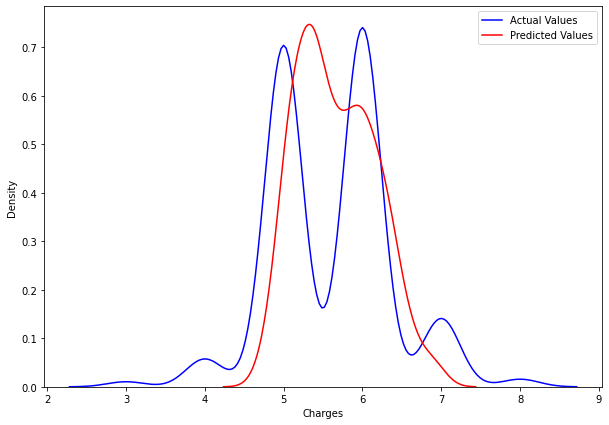

In [ ]:
### visualize the model prediction accuracy ###
import seaborn as sns
import matplotlib.pyplot as plt
### configure the plot ###
print('--- distplot accuracy --- ')
f, ax = plt.subplots(1, 1, figsize = (10, 7))
ax1 = sns.distplot(y_test, hist=False, color="b", label="Actual Values")
sns.distplot(y_pred, hist=False, color="r", label="Predicted Values" , axlabel='Charges', ax=ax1)
plt.legend()

##### RandomizedSearch CV 

In [ ]:
### copy the data frame ###
df3 = df.copy()

In [ ]:
### split the data into features & target sets ###
X = df3.iloc[:, 0:11].values 
y = df3.iloc[:, 11].values 
print('--- data shapes --- ')
print('X shape:', X.shape) 
print('y shape:', y.shape) 

--- data shapes --- 
X shape: (1599, 11)
y shape: (1599,)


In [ ]:
### set the train test split parameters ###
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # 80/20 

In [ ]:
### feature scaling ### 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
### polynomial regression + randomized search CV model ###
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
model2 = LinearRegression()
param_grid = {  # create the param grid 
            'copy_X': [True, False],
            'fit_intercept': [True, False],
            'n_jobs' : [2, 20], # 
            'normalize' : [True, False],
              }
CV_rfc = RandomizedSearchCV(model2, param_grid, cv=3) 
print('--- model runtime --- ')
%time CV_rfc.fit(X_train, y_train)
print('--- best params --- ')
CV_rfc.best_params_

--- model runtime --- 
CPU times: user 75.9 ms, sys: 60.9 ms, total: 137 ms
Wall time: 76.8 ms


{'copy_X': True, 'fit_intercept': True, 'n_jobs': 20, 'normalize': False}

In [ ]:
### polynomial regression model + random best params ###
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
poly = PolynomialFeatures(degree = 2) # degree = 2 
X_poly = poly.fit_transform(X_train)
poly.fit(X_poly, y_train)
X_test_poly = poly.fit_transform(X_test)
### linear regression model ###
model2 = LinearRegression(
                          copy_X= True,
                          fit_intercept= True,
                          n_jobs= 20,
                          normalize= False
                          ) 
print('--- model runtime --- ')
%time model2.fit(X_poly, y_train) 
y_pred = model2.predict(X_test_poly)
### create data frame of predictions and results ### 
y_pred_df = pd.DataFrame(y_pred, columns=["Predicted_Values" ])
y_test_df = pd.DataFrame(np.array(y_test), columns=["Real_Values"])
df_poly_final = pd.concat([y_test_df , y_pred_df] , axis=1)
print('--- real values vs predicted values ---')
print(df_poly_final.head())
print('--- model metrics ---') 
print('mean absolute error:', metrics.mean_absolute_error(y_test, y_pred)) # mae 
print('mean squared error:', metrics.mean_squared_error(y_test, y_pred)) # mse 
print('root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # rmse
print('intercept:', model2.intercept_) # get the intercept
print('coefficients:', model2.coef_) # get the coefficients
score = metrics.r2_score(y_test , y_pred) # get the r2 score 
print("r2 score : {}".format(score)) # show the r2 score
print('model score:', model2.score(X_poly, y_train)) # show the model score 
print("model accuracy: {}%".format(score * 100)) # show the model accuracy

--- model runtime --- 
CPU times: user 7.11 ms, sys: 7.01 ms, total: 14.1 ms
Wall time: 13.9 ms
--- real values vs predicted values ---
   Real_Values  Predicted_Values
0            6          5.483383
1            5          5.022187
2            7          6.909452
3            6          5.083932
4            5          5.834304
--- model metrics ---
mean absolute error: 0.4827426944601928
mean squared error: 0.4018809603800432
root mean squared error: 0.6339408177267364
intercept: 5.735155127927229
coefficients: [-1.48547329e-16  1.07268253e-01 -1.90047219e-01 -7.46384103e-02
  4.20015980e-02 -6.47881866e-02  8.95662811e-02 -1.43251961e-01
 -7.79772447e-02 -3.98638849e-02  2.68691515e-01  2.40079638e-01
 -1.60707484e-01 -4.84552592e-02 -9.41046512e-02 -1.28213529e-01
 -1.28821722e-01 -1.23730748e-01  9.82753305e-03  2.52937555e-01
 -1.75642314e-01  5.07224203e-02  1.10761394e-01 -9.68459932e-03
  5.90933665e-02 -5.51227895e-02  3.28935859e-02 -4.57216955e-02
  1.37823485e-01  1.861

--- distplot accuracy --- 


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


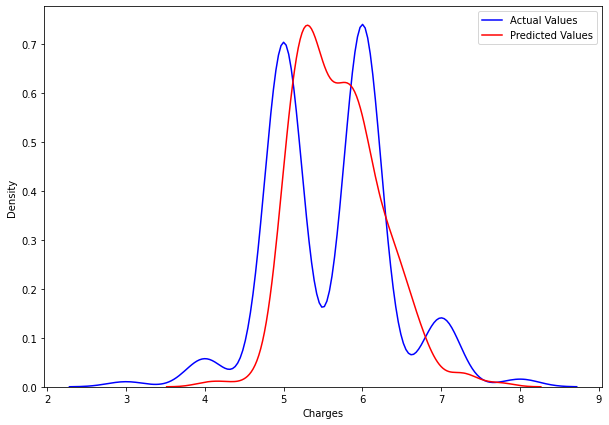

In [ ]:
### visualize the model prediction accuracy ###
import seaborn as sns
import matplotlib.pyplot as plt
### configure the plot ###
print('--- distplot accuracy --- ')
f, ax = plt.subplots(1, 1, figsize = (10, 7))
ax1 = sns.distplot(y_test, hist=False, color="b", label="Actual Values")
sns.distplot(y_pred, hist=False, color="r", label="Predicted Values" , axlabel='Charges', ax=ax1)
plt.legend()